In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

#load dataset

In [ ]:
df=pd.read_csv('/content/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.shape

(8124, 23)

In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.duplicated().sum().any()

False

In [ ]:
df.duplicated().sum().any()

False

In [ ]:
df.nunique()

,0
class,2
cap-shape,6
cap-surface,4
cap-color,10
bruises,2
odor,9
gill-attachment,2
gill-spacing,2
gill-size,2
gill-color,12


In [ ]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


drop one unique value column that not effect any decision making poison or edible

In [ ]:
#drop on unquie value columns
df.drop(['veil-type'],axis=1,inplace=True)

In [ ]:
#check duplicated column
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [ ]:
df.shape

(8124, 22)

#Data Exploration and Visualization

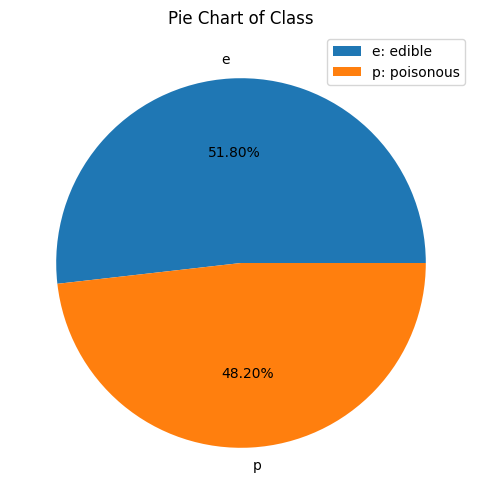

In [ ]:
#pie chart of class column value count
plt.figure(figsize=(6,6))
plt.pie(df['class'].value_counts(),labels=df['class'].value_counts().index,autopct='%1.2f%%')
plt.title('Pie Chart of Class')
plt.legend(['e: edible', 'p: poisonous'], loc="best")
plt.show()

In [ ]:
df['class'].value_counts()

,count
class,
e,4208
p,3916


In [ ]:
#create random color function
def random_colors(n):
    """Generate a list of n random colors."""
    colors = np.random.rand(n, 3)  # Generates an n x 3 array of random color RGB values
    return colors

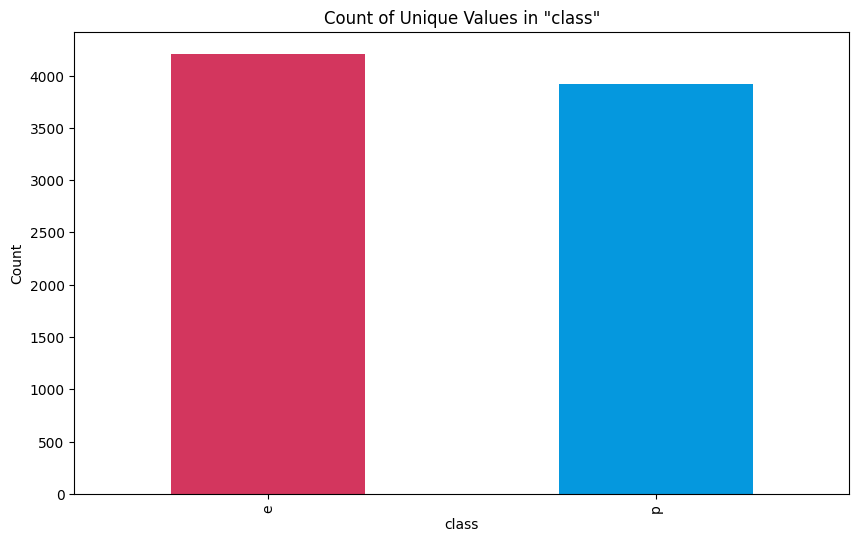

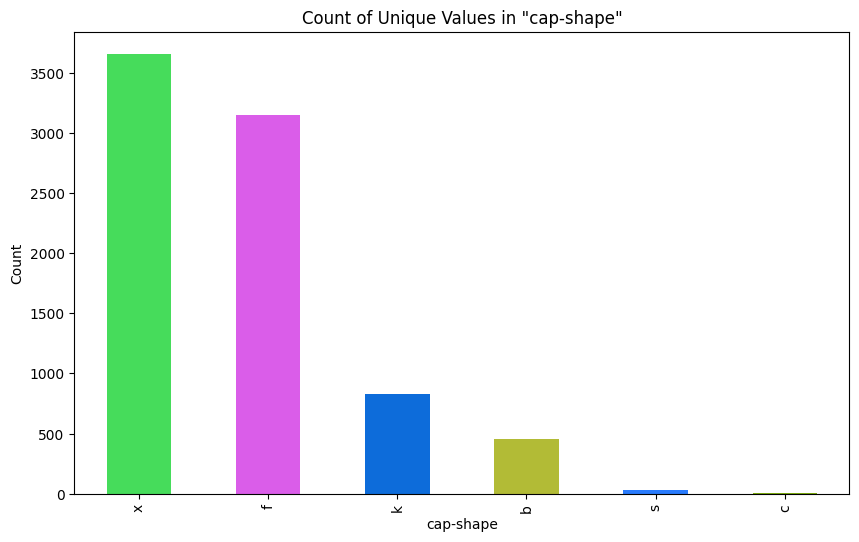

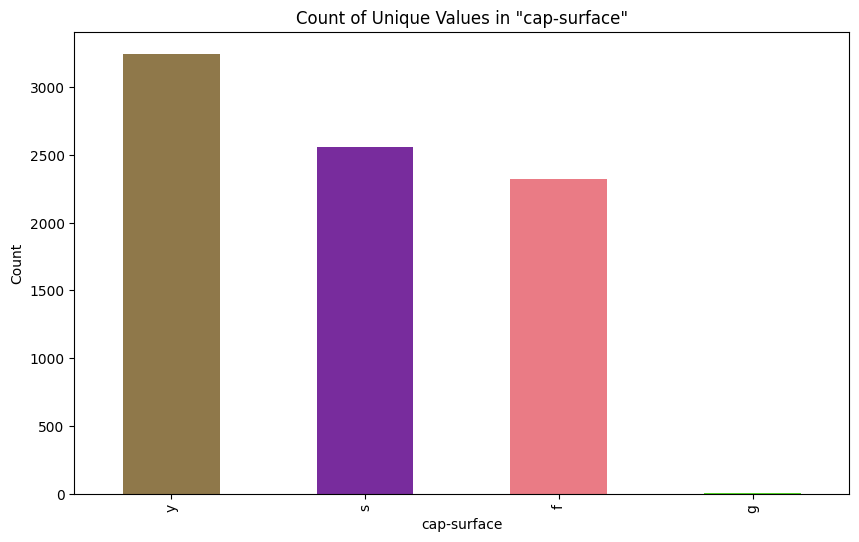

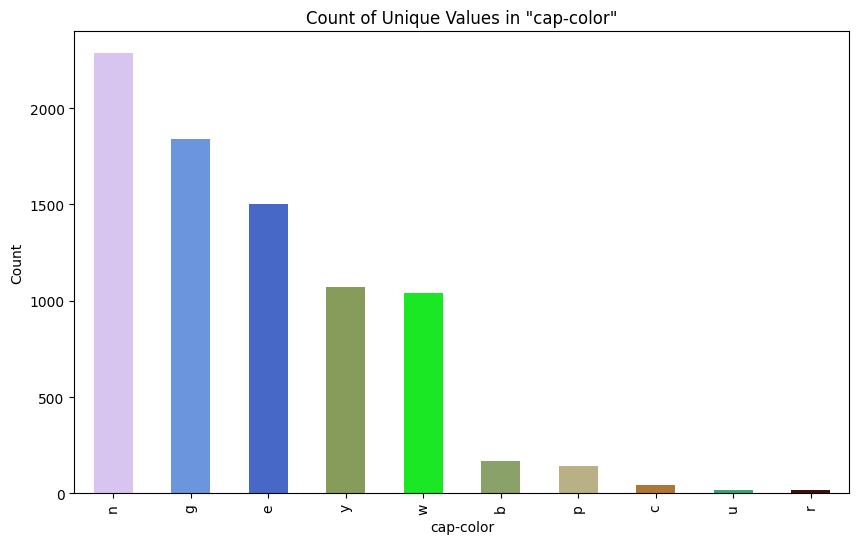

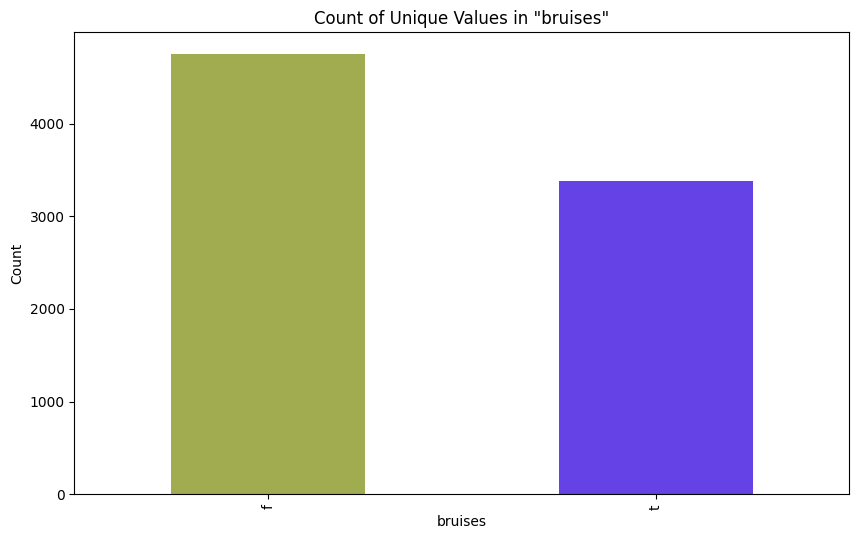

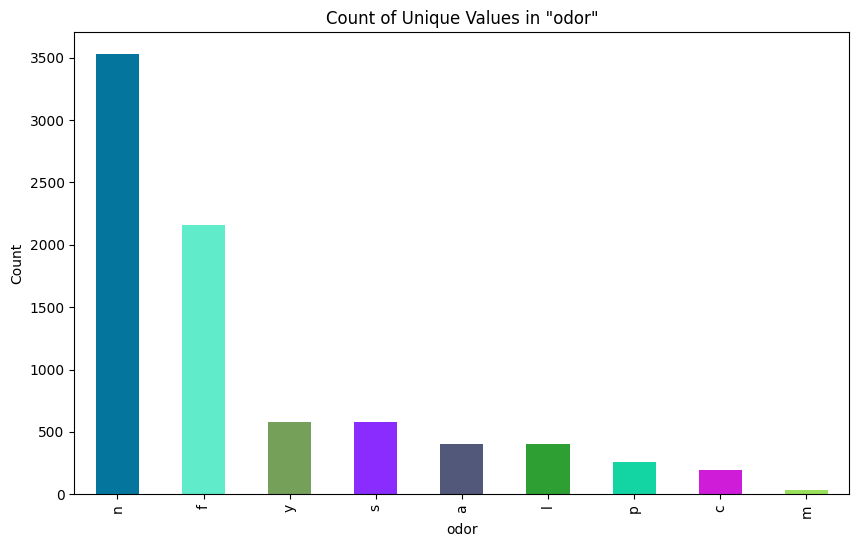

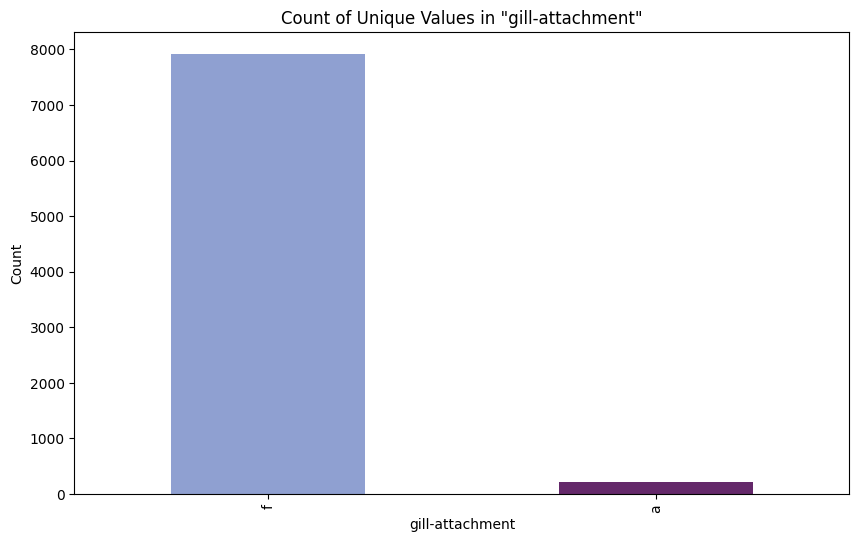

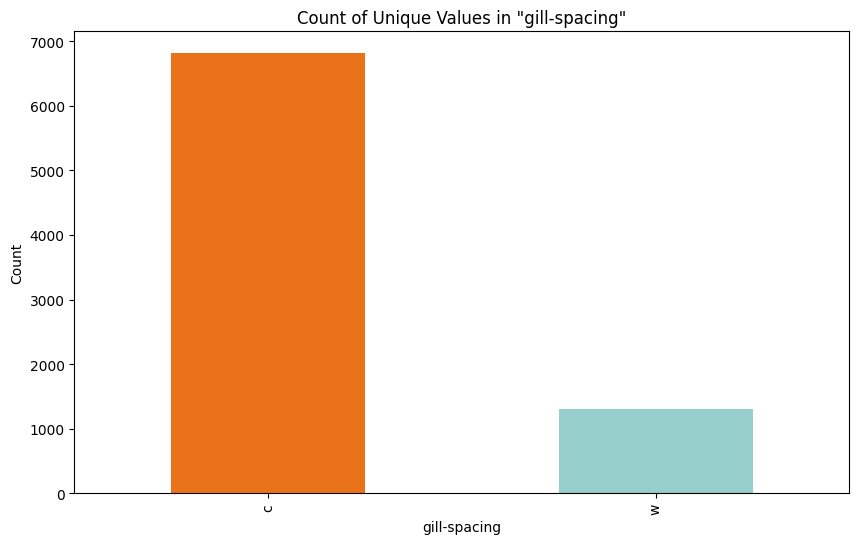

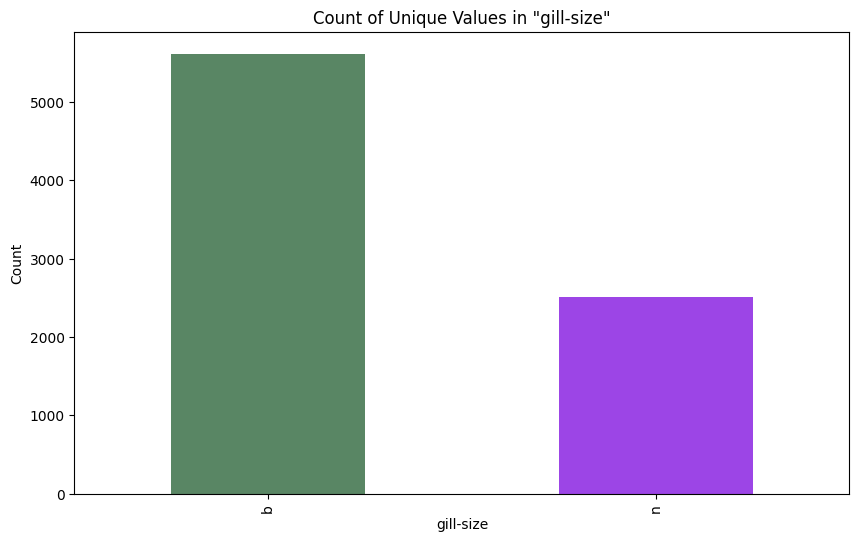

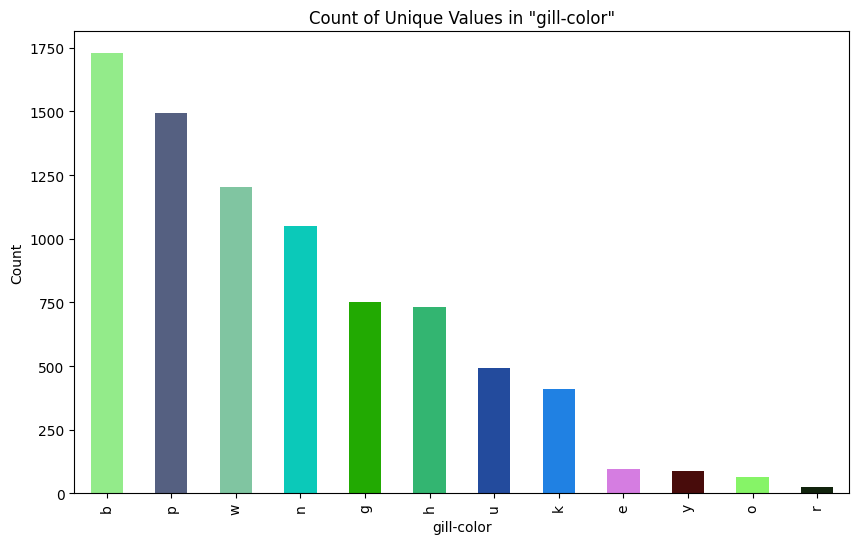

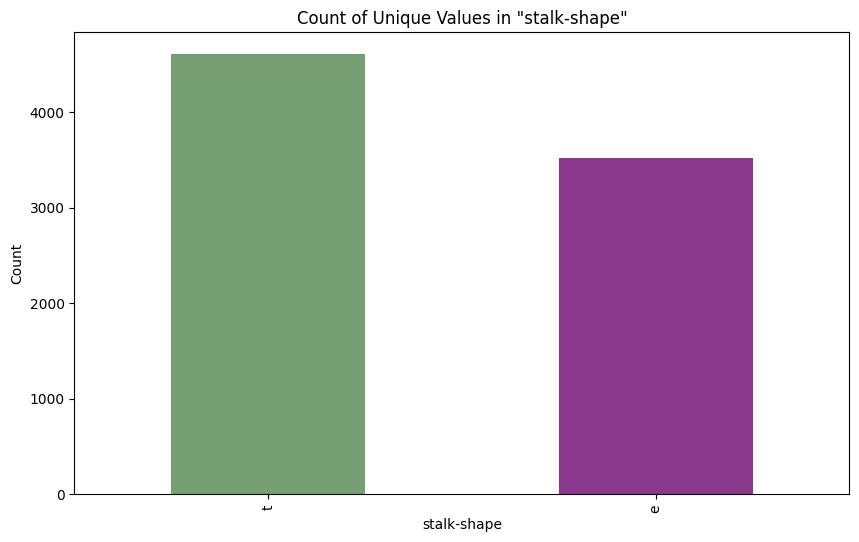

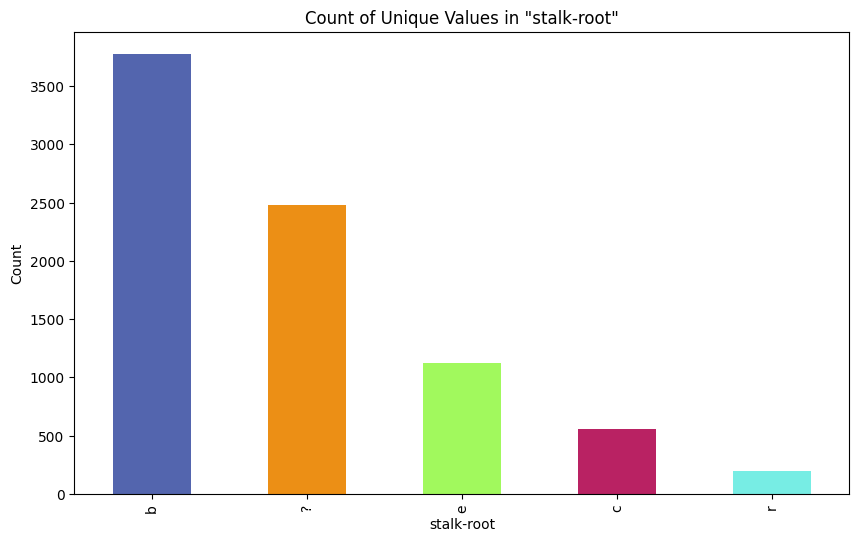

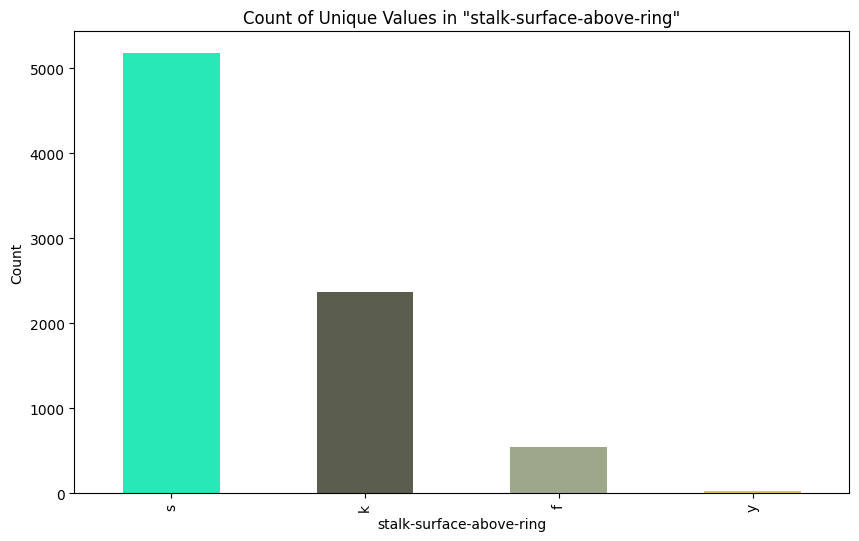

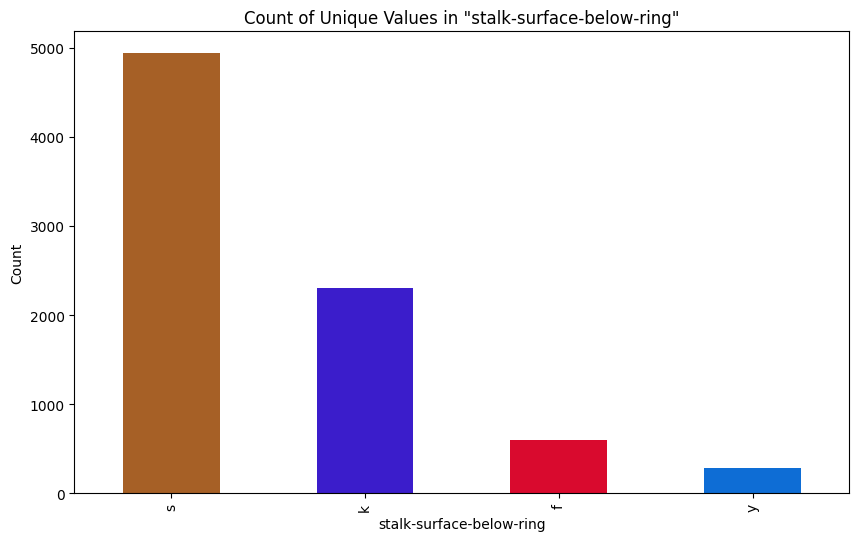

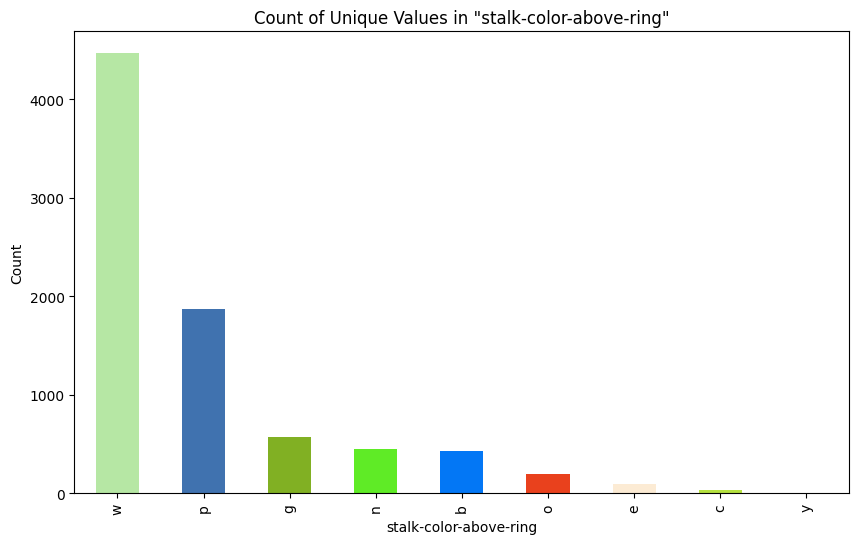

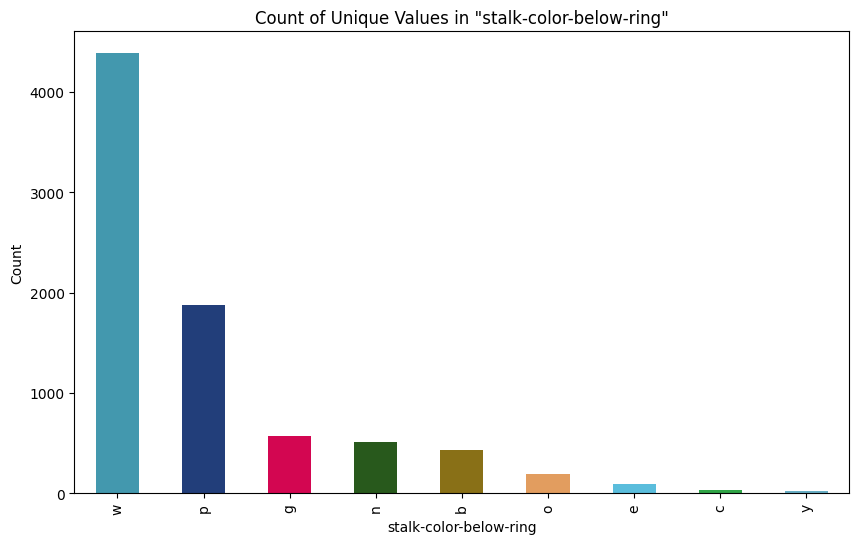

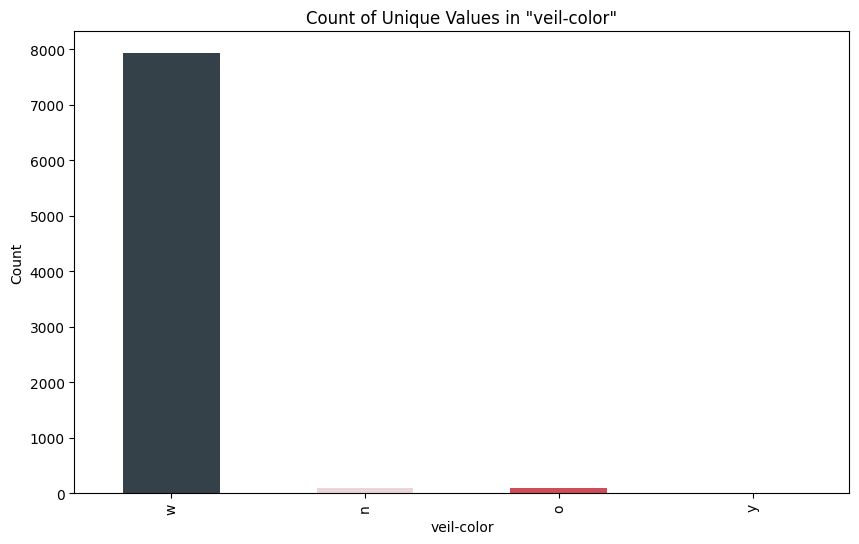

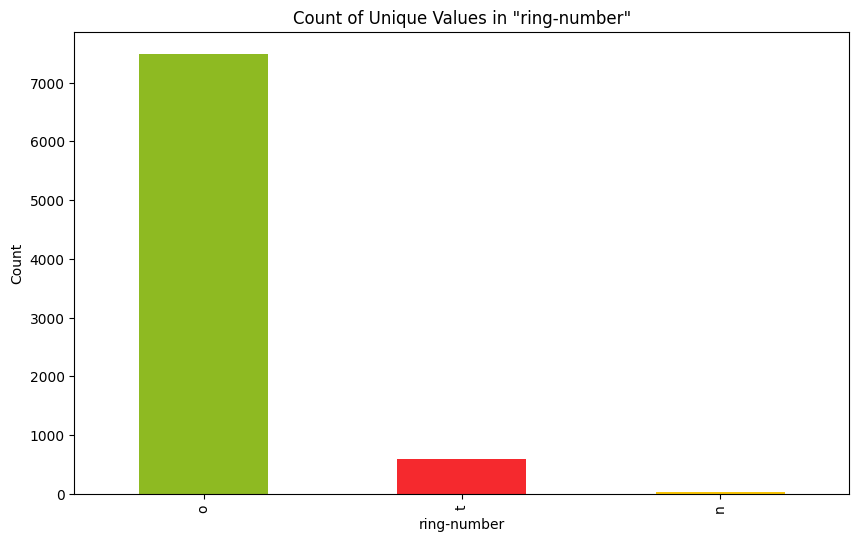

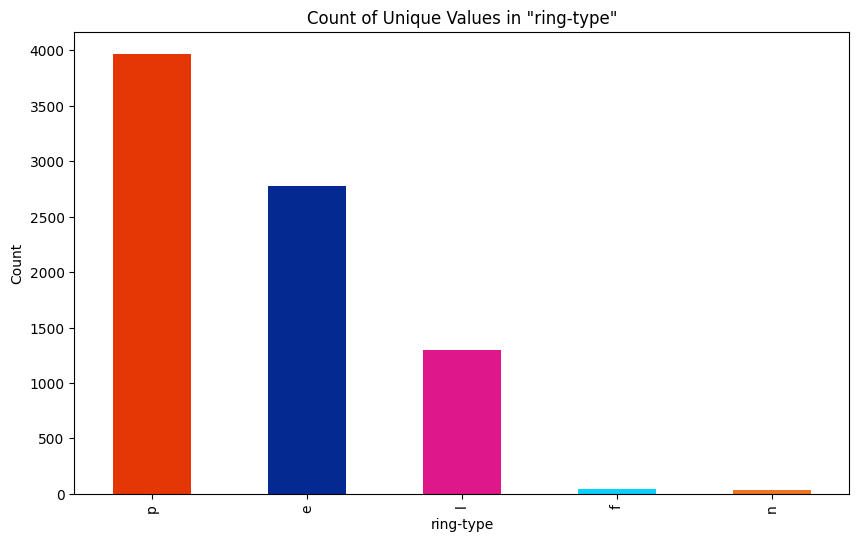

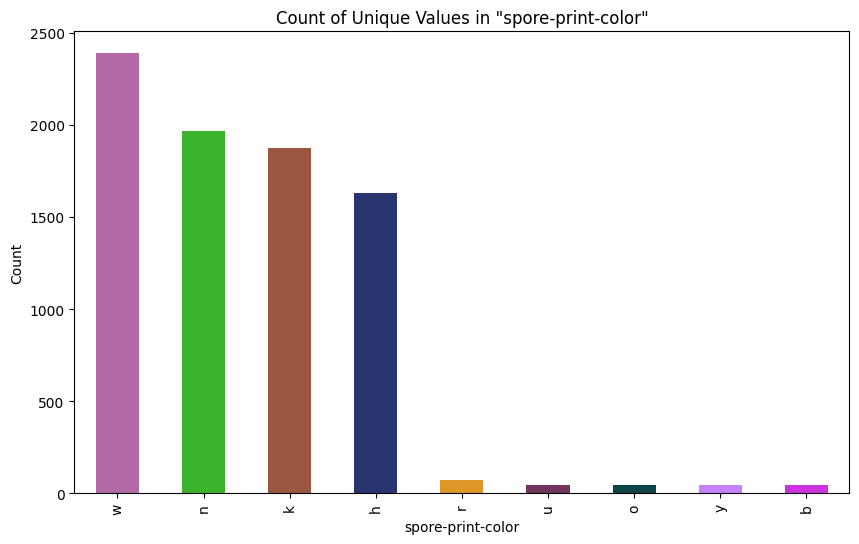

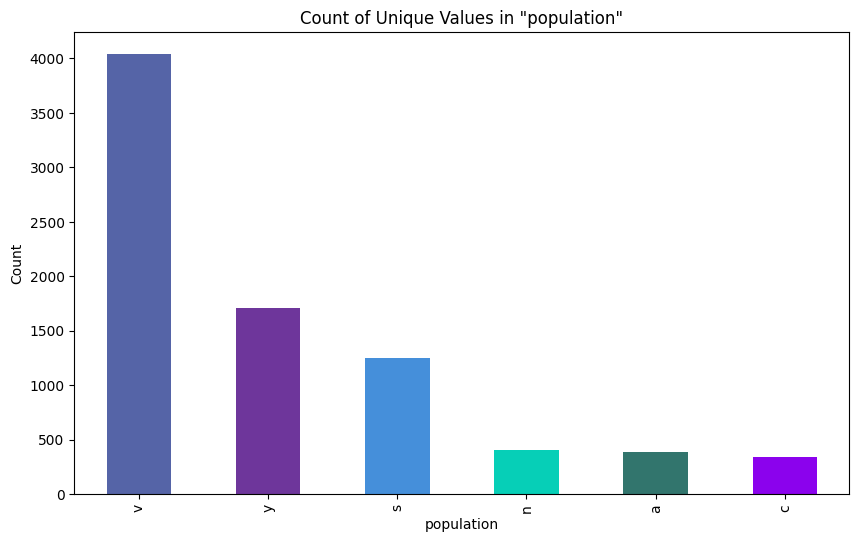

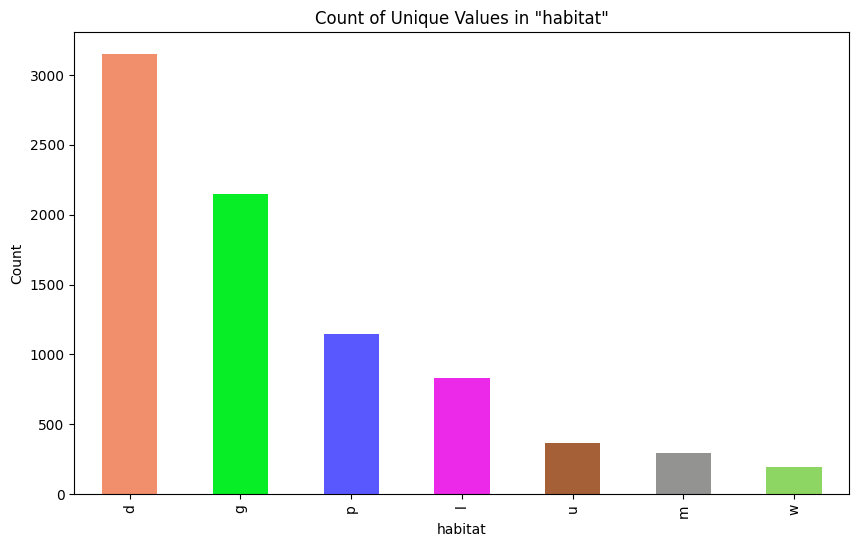

In [ ]:
for column in df.columns:
    value_counts = df[column].value_counts()
    plt.figure(figsize=(10, 6))
    # Generate random colors for each unique value
    colors = random_colors(len(value_counts))

    value_counts.plot(kind='bar', color=colors)
    plt.title(f'Count of Unique Values in "{column}"')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [ ]:
#copy the dataset
df1=df.copy()

#Convert categorical column in numerical column

In [ ]:
#apply label encoding in all column using for loop
for column in df.columns:
  le=LabelEncoder()
  df[column]=le.fit_transform(df[column])

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


1-poisons and 0-Edible mushroom

#Correlation features

In [ ]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


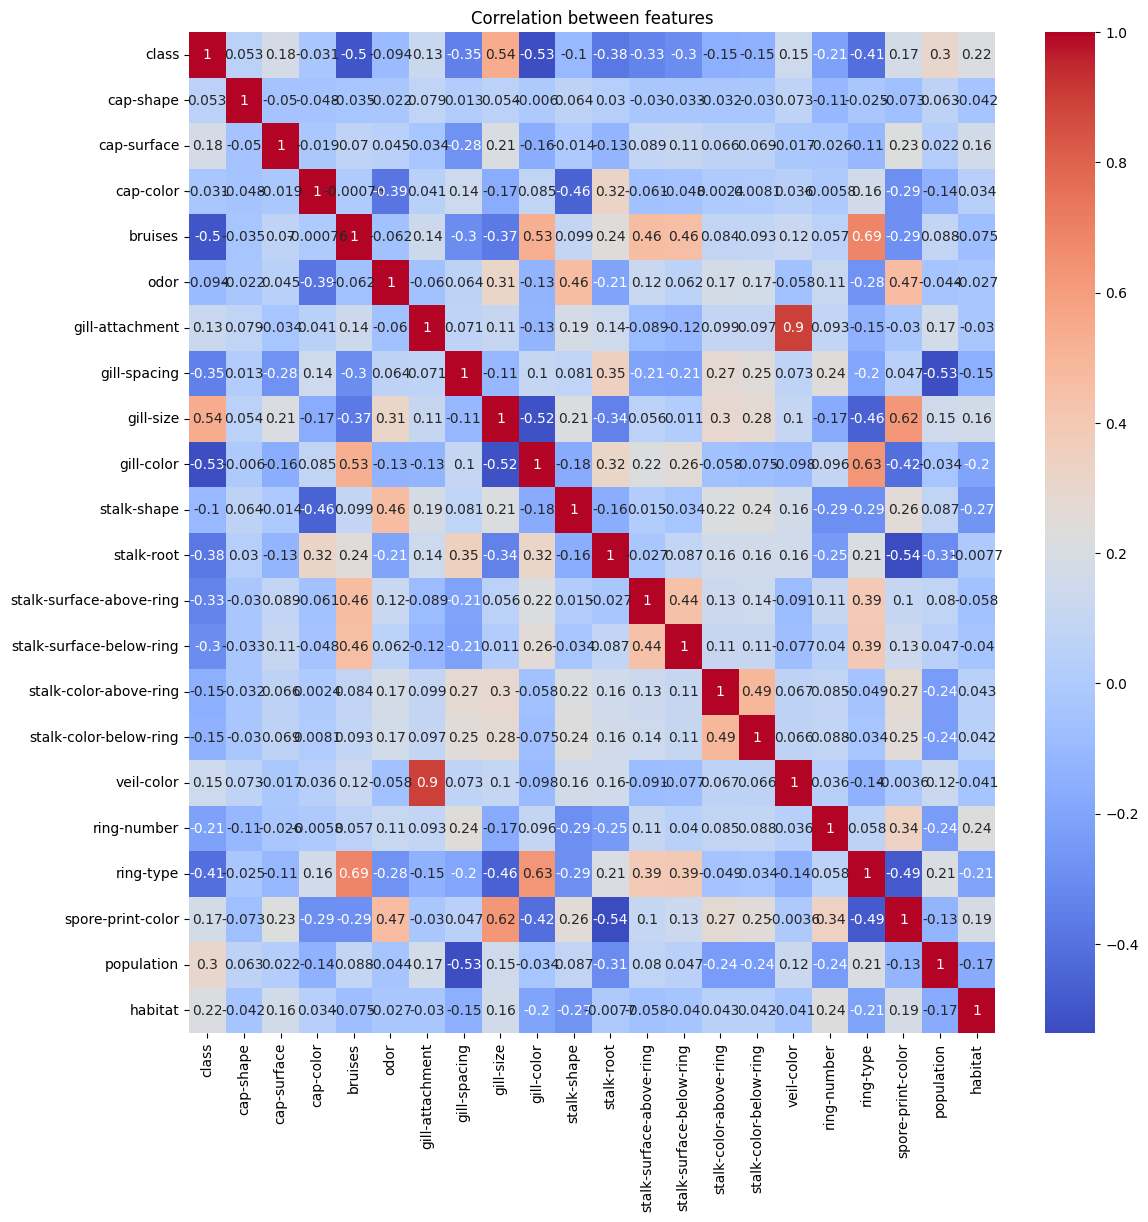

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation between features")
plt.show()

In [ ]:
X=df.drop('class',axis=1)
y=df['class']

#scaled dataset- X

In [ ]:
#scaled the dataset
sc=StandardScaler()
X_sc=sc.fit_transform(X)

In [ ]:
X_sc

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [ ]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
#convert array in to dataframe with column
X_sc=pd.DataFrame(X_sc,columns=X.columns)

In [ ]:
X_sc.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


#split the dataset in Train and Test dataset

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2,random_state=42)

#Model Selection according to accuracy prediction

In [ ]:
models={
    'LogisticRegression':LogisticRegression(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SVC':SVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier()
}

In [ ]:
#apply all model in then best model
best_model = None
best_accuracy = 0

#Loop through each model, train it, and evaluate performance
for name, model in models.items():
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.4f}")

    # Check if this model is the best so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

print(f"The best model is {best_model_name} with an accuracy of {best_accuracy:.4f}")

LogisticRegression: Accuracy = 0.9514
RandomForestClassifier: Accuracy = 1.0000
SVC: Accuracy = 1.0000
DecisionTreeClassifier: Accuracy = 1.0000
KNeighborsClassifier: Accuracy = 1.0000
The best model is RandomForestClassifier with an accuracy of 1.0000


In [ ]:
# Save the best model to a file using joblib
import joblib
joblib.dump(best_model, 'best_classification_model.pkl')
print("Best model saved as 'best_classification_model.pkl'")

Best model saved as 'best_classification_model.pkl'
